In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import matplotlib.patches as mpatches
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
results = pd.read_excel('../../results/experimental/cell-based-assays.xlsx', 'Sheet2', header=[0, 1, 2])
results = results.set_index(('class', 'assay', 'concentration'))
results = results.drop(results.columns[0], axis=1)
results = results.transpose()
results = results.rename_axis(['class', 'assay', 'concentration'], axis='index')
results['conc'] = results.index.get_level_values('concentration')
results['class'] = pd.Categorical(results.index.get_level_values('class'))
new_class_names = [r'A$\beta$ induced toxicity', r'A$\beta$ clearance', r'A$\beta$ secretion', 'Tau phosphorylation', 'LPS neuroinflammation', 'Neurogenesis, neurite outgrowth', 'Trophic factor withdrawal', 'Tau aggregation']
new_class_names = [X + ')  ' + c for X, c in zip(list('ABCDEFGH'), new_class_names)]
mapper = dict(zip(results['class'].cat.categories, new_class_names))
results = results.drop('class', axis=1)
results = results.rename(mapper, axis=0, level=0)
results = results.rename(dict(zip(results.columns, ['Chenodiol', 'Cysteamine', 'Arundine'])), axis=1)
results.to_csv('../../results/2022-09-21-cell-based-assays/rearranged-results.csv')
results

('class', 'assay', 'concentration')                               Chenodiol  \
class                         assay                concentration              
A)  A$\beta$ induced toxicity MTT (viability)      c1                   NaN   
                                                   c2                   NaN   
                                                   c3                   NaN   
B)  A$\beta$ clearance        Abeta in SN          c4                   0.0   
                                                   c5                   0.0   
...                                                                     ...   
G)  Trophic factor withdrawal LDH (cell death)     c2                   0.0   
                                                   c3                   0.0   
H)  Tau aggregation           Tau aggregation ΔRFU c4                   NaN   
                                                   c5                   NaN   
                                                   c6                   NaN   

('class', 'assay', 'concentration')                               Cysteamine  \
class                         assay                concentration               
A)  A$\beta$ induced toxicity MTT (viability)      c1                    NaN   
                                                   c2                    NaN   
                                                   c3                    NaN   
B)  A$\beta$ clearance        Abeta in SN          c4                    0.0   
                                                   c5                    1.0   
...                                                                      ...   
G)  Trophic factor withdrawal LDH (cell death)     c2                    0.0   
                                                   c3                    0.0   
H)  Tau aggregation           Tau aggregation ΔRFU c4                    NaN   
                                                   c5                    NaN   
                                                   c6                    NaN   

('class', 'assay', 'concentration')                               Arundine  \
class                         assay                concentration             
A)  A$\beta$ induced toxicity MTT (viability)      c1                  NaN   
                                                   c2                  NaN   
                                                   c3                  NaN   
B)  A$\beta$ clearance        Abeta in SN          c4                  0.0   
                                                   c5                 -1.0   
...                                                                    ...   
G)  Trophic factor withdrawal LDH (cell death)     c2                  0.0   
                                                   c3                  0.0   
H)  Tau aggregation           Tau aggregation ΔRFU c4                  NaN   
                                                   c5                  NaN   
                                                   c6                  NaN   

('class', 'assay', 'concentration')                              conc  
class                         assay                concentration       
A)  A$\beta$ induced toxicity MTT (viability)      c1              c1  
                                                   c2              c2  
                                                   c3              c3  
B)  A$\beta$ clearance        Abeta in SN          c4              c4  
                                                   c5              c5  
...                                                               ...  
G)  Trophic factor withdrawal LDH (cell death)     c2              c2  
                                                   c3              c3  
H)  Tau aggregation           Tau aggregation ΔRFU c4              c4  
                                                   c5              c5  
                                                   c

In [3]:
plt.rcParams['figure.facecolor'] = 'lightgray'

In [4]:
gb_class = results.groupby('class')
assays_per_class = {name: len(df) / 3 for name, df in gb_class}
assays_per_class

{'A)  A$\\beta$ induced toxicity': 1.0,
 'B)  A$\\beta$ clearance': 3.0,
 'C)  A$\\beta$ secretion': 3.0,
 'D)  Tau phosphorylation': 3.0,
 'E)  LPS neuroinflammation': 6.0,
 'F)  Neurogenesis, neurite outgrowth': 4.0,
 'G)  Trophic factor withdrawal': 4.0,
 'H)  Tau aggregation': 1.0}

['named-figure/cell-based-assays.png', 'named-figure/cell-based-assays.pdf']

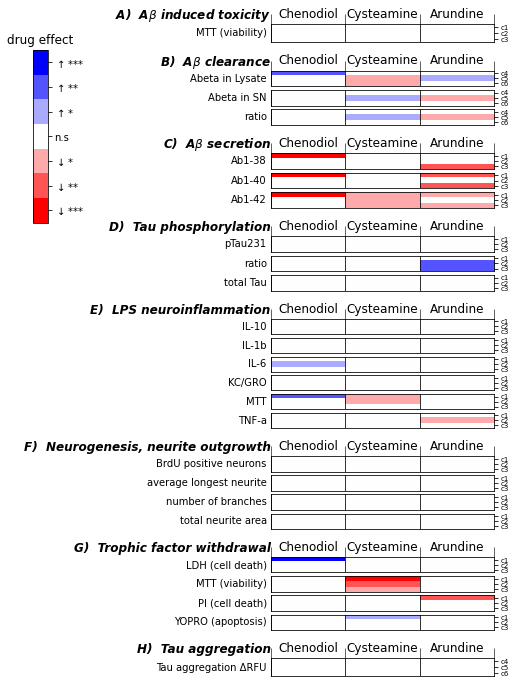

In [5]:
my_cmap = matplotlib.colors.ListedColormap(matplotlib.colormaps['bwr_r'](np.linspace(0, 1, 7)))
vmin = -3.5
vmax = 3.5
fig = plt.figure(figsize=(4, 12))
outer_grid = gridspec.GridSpec(len(gb_class), 1, height_ratios = list(assays_per_class.values()), figure=fig, hspace=0.5) 

def process_class(classname, classdata, i, fig):
    n_assays = int(len(classdata) / 3)
    first_assay_name = classdata.index.get_level_values('assay')[0]
    inner_gs = gridspec.GridSpecFromSubplotSpec(n_assays, 1, subplot_spec=outer_grid[i], hspace=0.25)
    gb_assay = classdata.groupby('assay')
    for j, zipitem in enumerate(zip(inner_gs, gb_assay)):
        cell, gbitem = zipitem
        ax = plt.subplot(cell)
        assay_name, assay_data = gbitem
        plot_assay(ax, assay_name, assay_data)
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=0, which='both', axis='x')
        if j == 0:
            ax.set_title(classname, loc='left', y=0.95, horizontalalignment='right', fontstyle='italic', fontweight='bold')
            ax.set_xticks(range(3))
            ax.set_xticklabels(results.columns[:-1], fontsize=12)#, rotation=-45, horizontalalignment='left')
            ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=10, which='minor')
    return(ax)

def plot_assay(axi, assay_name, assay_data):
        axi.imshow(assay_data.iloc[:, range(3)], aspect='auto', interpolation='none', cmap=my_cmap, vmin=vmin, vmax=vmax)
        axi.set_xticks(range(3))
        axi.set_yticks(range(assay_data.shape[0]))
        axi.set_yticklabels(assay_data.conc, fontsize=7)
        axi.set_ylabel(assay_name, rotation=0, verticalalignment='center', horizontalalignment='right')
        axi.tick_params(right=True, left=False, labelright=True, labelleft=False)
        axi.set_xticks([])
        axi.set_xticks(np.arange(4) - 0.5, minor=True)
        axi.grid(axis='x', which='minor', color='black')
        return(axi)


for i, classinfo in enumerate(gb_class):
    classname, classdata = classinfo
    axi = process_class(classname, classdata, i, fig)

#my_patch = mpatches.Patch(color='green', alpha=0.5, label='TWAS2+ gene set')
cb_ax = fig.add_axes([-0.7, 0.65, 0.05, 0.20])
cm = plt.cm.ScalarMappable(cmap=my_cmap)
cm.set_clim(vmin=vmin, vmax=vmax)
fig.colorbar(cm, cax=cb_ax)
cb_ax.set_yticks(np.arange(-3, 4, 1))
cb_ax.set_yticklabels([r'$\downarrow$***', r'$\downarrow$**', r'$\downarrow$*', r'n.s', r'$\uparrow$*', r'$\uparrow$**', r'$\uparrow$***'])
cb_ax.set_title('drug effect')
attila_utils.savefig(fig, 'cell-based-assays')

In [6]:
%connect_info

{
  "shell_port": 57757,
  "iopub_port": 57758,
  "stdin_port": 57759,
  "control_port": 57761,
  "hb_port": 57760,
  "ip": "127.0.0.1",
  "key": "192b6eda-fcf68202299b329a540fc75a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-da6a8744-3d2b-473c-90e7-75c28a21a897.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
